In [1]:
import random
import string

# target string
target = "charles darwin was always seasick"
length = len(target)

# allowed characters: lowercase + space
alphabet = string.ascii_lowercase + " "

# fitness function: number of matching characters in correct positions
def fitness(s):
    return sum(1 for a, b in zip(s, target) if a == b)

# create random initial string
current = "".join(random.choice(alphabet) for _ in range(length))
current_fitness = fitness(current)

generation = 0

# evolutionary loop (runs until perfect match)
while current != target:
    generation += 1

    # propose mutation
    position = random.randrange(length)
    mutated = list(current)
    mutated[position] = random.choice(alphabet)
    mutated = "".join(mutated)

    mutated_fitness = fitness(mutated)

    # accept mutation if fitness does not decrease
    if mutated_fitness >= current_fitness:
        current = mutated
        current_fitness = mutated_fitness

    print(f"gen {generation:5d}: {current}")


gen     1: hgvawerbeunswhbwmatbdrvibwwynuwdi
gen     2: hgvawerbeunswhbwmatmdrvibwwynuwdi
gen     3: hgvawerbeunswhbwmatmdriibwwynuwdi
gen     4: hgvawerbeunswhbwmatmdriibwwyquwdi
gen     5: hgvawerbeunswhbwmasmdriibwwyquwdi
gen     6: hgvaherbeunswhbwmasmdriibwwyquwdi
gen     7: hgvaherbeunswhbwmasmdriibwwyquwdi
gen     8: cgvaherbeunswhbwmasmdriibwwyquwdi
gen     9: cgvahelbeunswhbwmasmdriibwwyquwdi
gen    10: cgvahelbeunswhbwmasmdriibwwyquwdi
gen    11: cgvahelbeunswhbwmasmdriibwwyquwdi
gen    12: cgvzhelbeunswhbwmasmdriibwwyquwdi
gen    13: cgvzhelbeunswhbwmagmdriibwwyquwdi
gen    14: cgvzhelbeunswhbwmagmdryibwwyquwdi
gen    15: cgvzhelbeunswhbwmagmdryibwwyquwci
gen    16: cgvzhelbeunswhbwmagmdryibmwyquwci
gen    17: cgvzhelbeunswhbwmagrdryibmwyquwci
gen    18: cgvzhelbeunswhbwmagrdbyibmwyquwci
gen    19: cgvzhelbeunswhbwmdgrdbyibmwyquwci
gen    20: cgvzhelbeunswhbwmdgrdbyibmwyquwci
gen    21: cvvzhelbeunswhbwmdgrdbyibmwyquwci
gen    22: cvvzhelbsunswhbwmdgrdbyibmwyquwci
gen    23:

### b) One can say this is a good-natured optimization problem. Explain why this is plausible especially considering the implied ﬁtness landscape.

Since we randomly swap one character and the position of a character stays the same as soon as it is set, a correct character will always positively contribute to the fitness. Only if a correct character is swapped, will we experience a decrease in fitness. In this case we will backtrack to the last string since that is the better option in our case.
Since we only swap one character at a time, if our fitness increases, we are actually moving towards the global optimum ("charles darwin was always seasick").
Our Hill climber therefore has a monotonically improving fitness since our fitness never gets worse.

### c) 3. Give a mathematical estimation of how many generations are needed in average to ﬁnd the correct string. Test your predictions by determining an average empirically (produce many sample runs and average over the number of generations that were needed to ﬁnd the correct string).

Empirical results over 500 trials:
  mean generations   = 3558.504
  median generations = 3396.0
  std deviation      = 1059.544
  min / max          = 1400 / 8979

Theoretical (approx.) expected generations (reported) = 3616.119


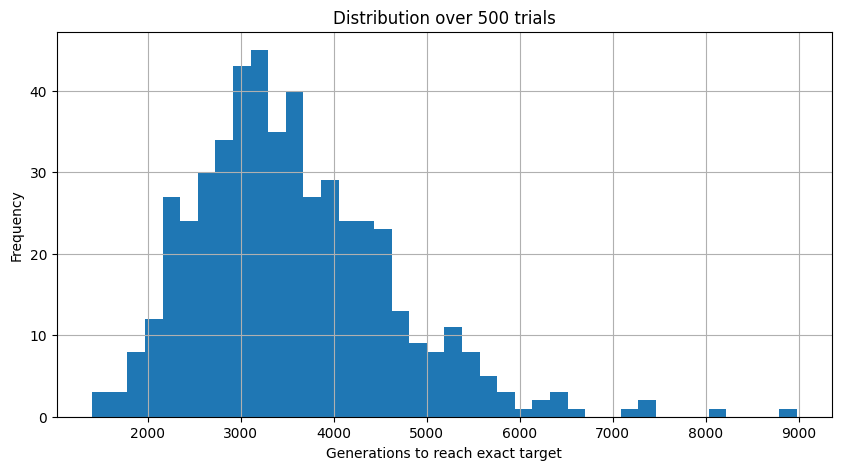


Empirical mean over 500 trials: 3558.504


In [3]:
import random
import string
import math
import statistics
import multiprocessing as mp
import matplotlib.pyplot as plt
from functools import partial

# =========================
# Problem specification
# =========================
target = "charles darwin was always seasick"
L = len(target)                          # 33
alphabet = string.ascii_lowercase + " "  # A = 27

# theoretical expected generations from derivation in the notebook
def theoretical_expected_generations(L=L, A=len(alphabet)):
    # approximate expected value by assuming initial K0 mean L/A
    # exact expression is A * L * H_{L-K0} averaged over K0 distribution,
    # but the closed form approximation used in the report is:
    mean_K0 = L / A
    # harmonic number H_n approximated by sum or using math.log + gamma
    n = int(round(L - mean_K0))
    Hn = sum(1.0 / i for i in range(1, n + 1))
    return A * L * Hn

# =========================
# Single-run hill climber
# =========================
def run_one_trial(seed, target=target, alphabet=alphabet):
    """
    Runs the hill-climber once using an independent RNG seeded by 'seed'.
    Returns the number of generations needed to reach the exact target string.
    """
    rng = random.Random(seed)
    L = len(target)
    # random initial string
    current = "".join(rng.choice(alphabet) for _ in range(L))

    def fitness(s):
        # number of characters in correct position
        return sum(1 for a, b in zip(s, target) if a == b)

    current_fitness = fitness(current)
    generations = 0

    # loop until exact match
    while current != target:
        generations += 1
        pos = rng.randrange(L)
        # propose a mutation
        mutated_list = list(current)
        mutated_list[pos] = rng.choice(alphabet)
        mutated = "".join(mutated_list)
        mutated_fitness = fitness(mutated)

        # accept if not worse
        if mutated_fitness >= current_fitness:
            current = mutated
            current_fitness = mutated_fitness

    return generations

# =========================
# Driver: run many trials
# =========================
def run_experiments(num_trials=500, use_multiprocessing=True, plot_histogram=True):
    """
    Runs num_trials independent experiments and prints summary statistics.
    """
    seeds = [random.randrange(2**30) for _ in range(num_trials)]

    if use_multiprocessing:
        cpu_count = mp.cpu_count()
        with mp.Pool(cpu_count) as pool:
            results = pool.map(run_one_trial, seeds)
    else:
        results = [run_one_trial(s) for s in seeds]

    # summary statistics
    mean_val = statistics.mean(results)
    median_val = statistics.median(results)
    stdev_val = statistics.stdev(results) if len(results) > 1 else 0.0
    min_val = min(results)
    max_val = max(results)

    print("Empirical results over {:d} trials:".format(num_trials))
    print(f"  mean generations   = {mean_val:.3f}")
    print(f"  median generations = {median_val}")
    print(f"  std deviation      = {stdev_val:.3f}")
    print(f"  min / max          = {min_val} / {max_val}")

    theoretical = theoretical_expected_generations()
    print(f"\nTheoretical (approx.) expected generations (reported) = {theoretical:.3f}")

    if plot_histogram:
        plt.figure(figsize=(10, 5))
        plt.hist(results, bins=40)
        plt.xlabel("Generations to reach exact target")
        plt.ylabel("Frequency")
        plt.title(f"Distribution over {num_trials} trials")
        plt.grid(True)
        plt.show()

    return results

# =========================
# Run when invoked as script
# =========================
if __name__ == "__main__":
    # adjust number of trials here if desired
    num_trials = 500

    # set to False to run sequentially (useful for debugging or single-core systems)
    use_multiprocessing = True

    # set to False to skip plotting
    plot_histogram = True

    results = run_experiments(num_trials=num_trials,
                              use_multiprocessing=use_multiprocessing,
                              plot_histogram=plot_histogram)

    # print the empirical mean again for clarity
    print(f"\nEmpirical mean over {num_trials} trials: {statistics.mean(results):.3f}")
